In [1]:
import numpy as np
import scipy.constants as constants
import matplotlib.pyplot as plt
import os
import pyfits
import matplotlib.gridspec as gridspec

In [2]:
def espectro(nombre,x_i,x_f,y_c,delta_y,alrededor,segundo):
    escala = 1.50178489703
    """Obtencion de datos"""
    imagen_nova = pyfits.open(nombre)
    nova = imagen_nova['Primary'].data
    """obtencion del espectro"""
    y_i = y_c-delta_y
    y_f = y_c+delta_y
    y = []
    x = []
    x_2 = []
    for g in range(x_f-x_i):
        conteo = 0
        for i in range(y_f-y_i):
            #conteo.append(nova[y_i+i][x_i+g])
            conteo += (nova[y_i+i][x_i+g])
        y.append(conteo)
        
        if nombre == '04_NovaSMC_60s.fits':
            x.append((x_i+g-1142)*-escala)
        else:
            x_2.append(x_i+g)
    if nombre != '04_NovaSMC_60s.fits':
        maximo = max(y)
        for t in range(len(y)):
            if y[t]==maximo:
                  indice = t
        for t in range(len(y)):
            x.append((x_2[t]-x_2[indice])*-escala)
    """calculo del ruido"""
    conteo_2 = []
    x_i_2, x_f_2 = x_i-alrededor, x_f+alrededor
    y_i_2, y_f_2 = y_i-alrededor, y_f+alrededor
    for g in range(x_f_2-x_i_2):
        for i in range(y_f_2-y_i_2):
            if x_i_2+g>x_i and x_i_2+g<x_f and y_i_2+i>y_i and y_i_2+i<y_f :
                pass
            else:
                conteo_2.append(nova[y_i_2+i][x_i_2+g])
    ruido = np.mean(conteo_2)
    std_ruido = np.std(conteo_2)
    ruido_2 = ruido*(y_f-y_i)
    """graficos"""
    plots = [plt.plot(x,y), plt.axhline(ruido_2+3*std_ruido,label='ruido',linewidth=1.5, color='r',ls='--')]
    #if segundo==True:
    return plots


def plot_imagen(nombre):
    imagen = pyfits.open(nombre)
    datos = imagen['Primary'].data
    return plt.imshow(datos, cmap='gray',clim=(0.0, 6000.0))

In [3]:
def plot_doble(nombre,x_i,x_f,y_c,delta_y,alrededor):
    plt.figure(1)
    plt.subplot(211)
    plot_imagen(nombre)
    plt.subplot(212)
    espectro(nombre,x_i,x_f,y_c,delta_y,alrededor,True)


def plot_triple(nombre,x_i,x_f,y_c,delta_y,alrededor,x_i_2,x_f_2,ylim):
    plt.figure(1)
    gs = gridspec.GridSpec(5, 1,height_ratios=[4,.5,3,.5,3],width_ratios=[5,.5,3,.5,3])
    ax1 = plt.subplot(gs[0])
    plot_imagen(nombre)
    
    ax2 = plt.subplot(gs[2])
    espectro(nombre,x_i,x_f,y_c,delta_y,alrededor,True)
    
    ax3 = plt.subplot(gs[4])
    espectro(nombre,x_i,x_f,y_c,delta_y,alrededor,False)
    plt.xlim(x_i_2,x_f_2)
    plt.ylim(0,ylim)   
def plot_doble_2(nombre,x_i,x_f,y_c,delta_y,alrededor,x_i_2,x_f_2,ylim):
    plt.figure(1,figsize=(5,6))
    plt.subplot(311)
    espectro(nombre,x_i,x_f,y_c,delta_y,alrededor,False)
    if nombre!='12_epspsa_0p2s_b2.FIT': 
        plt.xlim(-100,850)
    else:
        plt.xlim(-100,700)
    plt.subplot(312)
    espectro(nombre,x_i,x_f,y_c,delta_y,alrededor,True)
    plt.xlim(x_i_2,x_f_2)
    plt.ylim(0,ylim)



In [4]:
"""obtecion de la escala"""
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
x_i, x_f, y_c, delta_y, alrededor = 500, 1200, 750, 15, 10
imagen_nova = pyfits.open('12_NovaSMC_60s.fits')
nova = imagen_nova['Primary'].data
y_i, y_f = y_c-delta_y, y_c+delta_y
y,x = [],[] 
for g in range(x_f-x_i):
		conteo = []
		for i in range(y_f-y_i):
		 conteo.append(nova[y_i+i][x_i+g])
		y.append(np.mean(conteo))
		x.append(x_i+g)
xy = []
xy_2 = []
for i in range(len(x)):
	xy.append([y[i],x[i]])
	if x[i]>900:
		xy_2.append([y[i],x[i]])
print max(xy)
print max(xy_2)
dist = 1142-705
h_alpha = 656.28
escala =h_alpha/dist
print dist, h_alpha
print escala

[3461.4000000000001, 705]
[2654.4000000000001, 1142]
437 656.28
1.50178489703


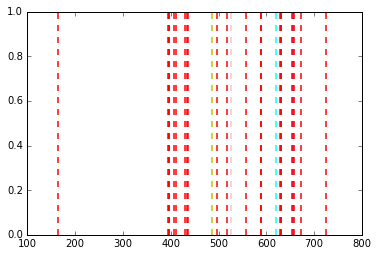

In [25]:
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
"""todas las lineas"""
figdata=plt.figure()
ax = plt.gca()

plt.axvline(656.28,label=r'$H\alpha$',linewidth=1.5, color='m',ls='--')
plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')
plt.axvline(627.661,label='oxigeno',linewidth=1.5, color='r',ls='--')
plt.axvline(527.039,label='hierro',linewidth=1.5, color='pink',ls='--')
plt.axvline(396.837,label='calcio',linewidth=1.5, color='r',ls='--')
plt.axvline(164.04,label='Helio II',linewidth=1.5, color='r',ls='--')
plt.axvline(407.23,label='S II',linewidth=1.5, color='r',ls='--')
plt.axvline(410.289 ,label=r'$H\Delta$',linewidth=1.5, color='r',ls='--')
plt.axvline(434.168 ,label=r'$H\gamma$',linewidth=1.5, color='r',ls='--')
plt.axvline(436.4436,label='oxigeno III',linewidth=1.5, color='r',ls='--')
plt.axvline(496.0295,label='oxigeno III',linewidth=1.5, color='r',ls='--')
plt.axvline(630.2046,label='oxigeno I',linewidth=1.5, color='r',ls='--')
plt.axvline(652.903 ,label='Nitrogeno I',linewidth=1.5, color='r',ls='--')
plt.axvline(658.527 ,label='Nitrogeno II',linewidth=1.5, color='r',ls='--')
plt.axvline(671.829,label='asufre II (S)',linewidth=1.5, color='r',ls='--')

plt.axvline(393.4777,label='K',linewidth=1.5, color='r',ls='--')
plt.axvline(396.9588,label='H',linewidth=1.5, color='r',ls='--')
plt.axvline(430.561,label='G',linewidth=1.5, color='r',ls='--')
plt.axvline(517.67,label='Mg',linewidth=1.5, color='r',ls='--')
plt.axvline(589.56,label='Na',linewidth=1.5, color='r',ls='--')
plt.axvline(557.85,label='Cielo',linewidth=1.5, color='r',ls='--')
plt.axvline(589.46,label='Cielo',linewidth=1.5, color='r',ls='--')
plt.axvline(630.17,label='Cielo',linewidth=1.5, color='r',ls='--')
plt.axvline(724.60,label='Cielo',linewidth=1.5, color='r',ls='--')

plt.axvline(620.0 ,label='oxido de titanio',linewidth=1.5, color='cyan',ls='--')


figLegend = plt.figure(figsize = (1.8,6))
plt.figlegend(*ax.get_legend_handles_labels(), loc = 'upper left')

figLegend.savefig("legend.pdf")

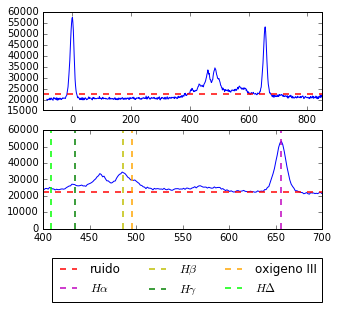

In [26]:
"""Nova"""
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
#plot_doble('04_NovaSMC_60s.fits',500,1200,750,15,10)
#plot_doble('04_NovaSMC_60s.fits',500,900,750,15,10)
plot_doble_2('12_NovaSMC_60s.fits',500,1200,750,8,10,400,700,60000)

plt.axvline(656.28,label=r'$H\alpha$',linewidth=1.5, color='m',ls='--')
plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')
plt.axvline(434.168 ,label=r'$H\gamma$',linewidth=1.5, color='g',ls='--')
plt.axvline(496.0295,label='oxigeno III',linewidth=1.5, color='orange',ls='--')
plt.axvline(408.289 ,label=r'$H\Delta$',linewidth=1.5, color='lime',ls='--')


plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=3)
plt.savefig('00_Nova.pdf')

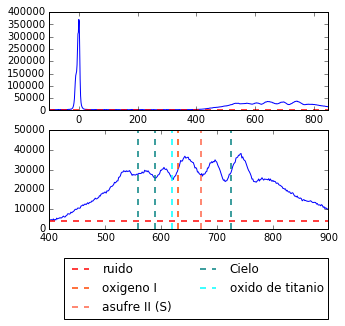

In [55]:
"""NuTuc""" #1 M4III mag:4.81
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
plot_doble_2('03_NuTuc_0p2s_b2.FIT',200,1000,500,15,15,400,900,50000)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')


plt.axvline(630.2046,label='oxigeno I',linewidth=1.5, color='orangered',ls='--')
plt.axvline(671.829,label='asufre II (S)',linewidth=1.5, color='tomato',ls='--')
plt.axvline(557.85,label='Cielo',linewidth=1.5, color='teal',ls='--')
plt.axvline(589.46,linewidth=1.5, color='teal',ls='--')
plt.axvline(724.60,linewidth=1.5, color='teal',ls='--')

plt.axvline(620.0 ,label='oxido de titanio',linewidth=1.5, color='cyan',ls='--')


plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=2)
plt.savefig('01_nutuc.pdf')

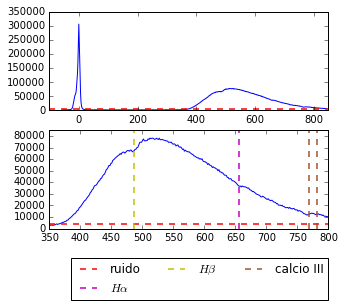

In [57]:
"""GamCap""" #1 F0p mag:3.68
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
#plot_doble('06_gamcap_0p2s_b2.FIT',700,1300,860,15,15)
#plot_doble('06_gamcap_0p2s_b2.FIT',750,1000,860,15,15)
#plot_triple('06_gamcap_0p2s_b2.FIT',700,1300,860,15,15,750,1000)
plot_doble_2('06_gamcap_0p2s_b2.FIT',700,1300,860,10,15,350,800,85000)

plt.axvline(656.28,label=r'$H\alpha$',linewidth=1.5, color='m',ls='--')
plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')
plt.axvline(781.9,label='calcio III',linewidth=1.5, color='sienna',ls='--')
plt.axvline(769.3,linewidth=1.5, color='sienna',ls='--')



plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=3)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('02_GamCap.pdf')


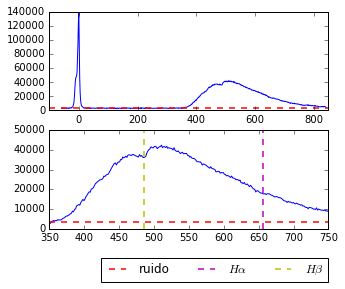

In [31]:
"""mupsa""" #3 A1III mag:4.99
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
#plot_doble('09_mupsa_0p2s_b2.FIT',500,1100,870,15,15)
plot_doble_2('09_mupsa_0p2s_b2.FIT',500,1100,870,15,15,350,750,50000)

plt.axvline(656.28,label=r'$H\alpha$',linewidth=1.5, color='m',ls='--')
plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')
plt.axvline(,label='',linewidth=1.5, color='y',ls='--')
plt.axvline(,label='',linewidth=1.5, color='y',ls='--')


plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=3)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('03_mupsa.pdf')

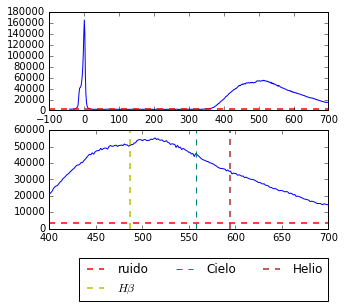

In [66]:
"""epspsa""" #4 epspsa mag:
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
plot_doble_2('12_epspsa_0p2s_b2.FIT',800,1300,335,10,10,400,700,60000)
plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')
plt.axvline(557.85,label='Cielo',linewidth=1, color='teal',ls='--')
plt.axvline(594.1,label='Helio',linewidth=1.5, color='brown',ls='--')

plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=3)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('04_epspsa.pdf')

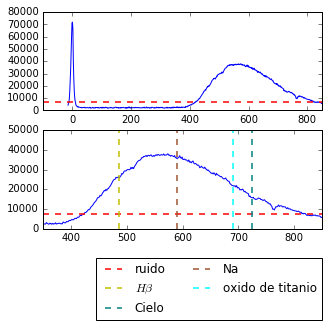

In [54]:
"""zetcap""" #5 G4Ib mag:3.74
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
plot_doble_2('27_34zetcap_0p2s_b2.FIT',450,1200,425,10,15,350,850,50000)
plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')
plt.axvline(724.60,label='Cielo',linewidth=1.5, color='teal',ls='--')
plt.axvline(589.56,label='Na',linewidth=1.5, color='sienna',ls='--')
plt.axvline(690.0 ,label='oxido de titanio',linewidth=1.5, color='cyan',ls='--')


plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=2)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('05_zetcap.pdf')

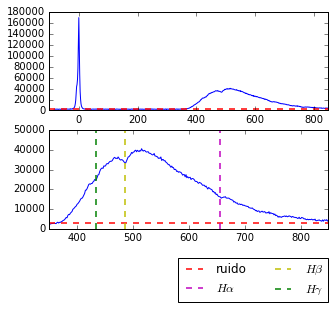

In [37]:
"""epsaqr""" #6 A1v mag:3.77
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
plot_doble_2('18_epsaqr_0p2s_b2.FIT',200,1000,394,10,15,350,850,50000)
plt.axvline(656.28,label=r'$H\alpha$',linewidth=1.5, color='m',ls='--')
plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')
plt.axvline(434.168 ,label=r'$H\gamma$',linewidth=1.5, color='g',ls='--')


plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=2)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('06_epsaqr.pdf')

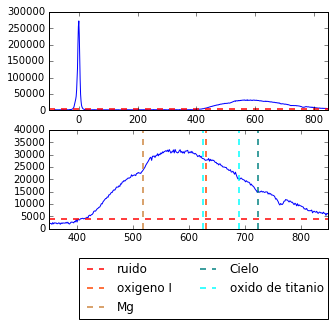

In [42]:
"""aqr""" #7 K0III mag:3.97
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
plot_doble_2('21_66aqr_0p2s_b2.FIT',500,1250,367,10,10,350,850,40000)

plt.axvline(630.2046,label='oxigeno I',linewidth=1.5, color='orangered',ls='--')

plt.axvline(517.67,label='Mg',linewidth=1.5, color='peru',ls='--')
plt.axvline(724.60,label='Cielo',linewidth=1.5, color='teal',ls='--')

plt.axvline(625.0 ,label='oxido de titanio',linewidth=1.5, color='cyan',ls='--')
plt.axvline(690.0 ,linewidth=1.5, color='cyan',ls='--')


plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=2)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('07_aqr.pdf')

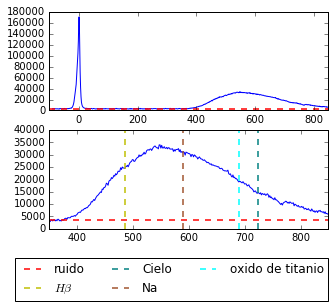

In [68]:
"""gammic""" #8 G6III mag:4.67
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
plot_doble_2('15_gammic_0p2s_b2.FIT',600,1350,186,15,15,350,850,40000)


plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')
plt.axvline(724.60,label='Cielo',linewidth=1.5, color='teal',ls='--')
plt.axvline(589.56,label='Na',linewidth=1.5, color='sienna',ls='--')
plt.axvline(690.0 ,label='oxido de titanio',linewidth=1.5, color='cyan',ls='--')


plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=3)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('08_gammic.pdf')

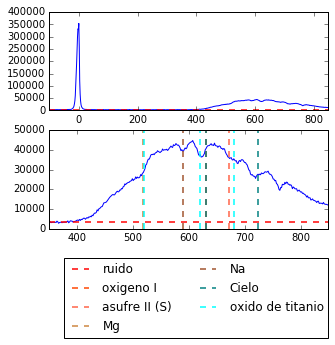

In [52]:
"""cap""" #9 M0.5III mag:4.50
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits')
plot_doble_2('24_24cap_0p2s_b2.FIT',300,1100,625,15,15,350,850,50000)


plt.axvline(630.2046,label='oxigeno I',linewidth=1.5, color='orangered',ls='--')
plt.axvline(671.829,label='asufre II (S)',linewidth=1.5, color='tomato',ls='--')

plt.axvline(517.67,label='Mg',linewidth=1.5, color='peru',ls='--')
plt.axvline(589.56,label='Na',linewidth=1.5, color='sienna',ls='--')
plt.axvline(630.17,label='Cielo',linewidth=1.5, color='teal',ls='--')
plt.axvline(724.60,linewidth=1.5, color='teal',ls='--')

plt.axvline(520.0 ,label='oxido de titanio',linewidth=1.5, color='cyan',ls='--')
plt.axvline(620.0 ,linewidth=1.5, color='cyan',ls='--')
plt.axvline(680.0 ,linewidth=1.5, color='cyan',ls='--')


plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=2)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('09_cap.pdf')

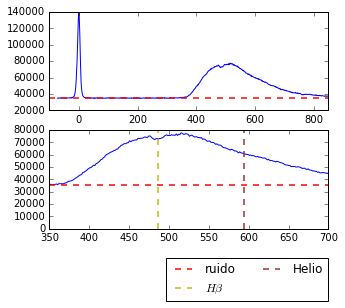

In [69]:
"""alppav""" #10 B2Iv mag:1.90
%matplotlib inline
os.chdir('/home/rai/Desktop/taller_1/tarea_5/fits/otro_grupo')
plot_doble_2('14_alppav_0p2_b2.FIT',100,800,398,15,15,350,700,80000)

plt.axvline(486.134,label=r'$H\beta$',linewidth=1.5, color='y',ls='--')

plt.legend(bbox_to_anchor=(1, -.3), loc=1, borderaxespad=0.,ncol=2)
os.chdir('/home/rai/Desktop/taller_1/tarea_5')
plt.savefig('10_alppav.pdf')